1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


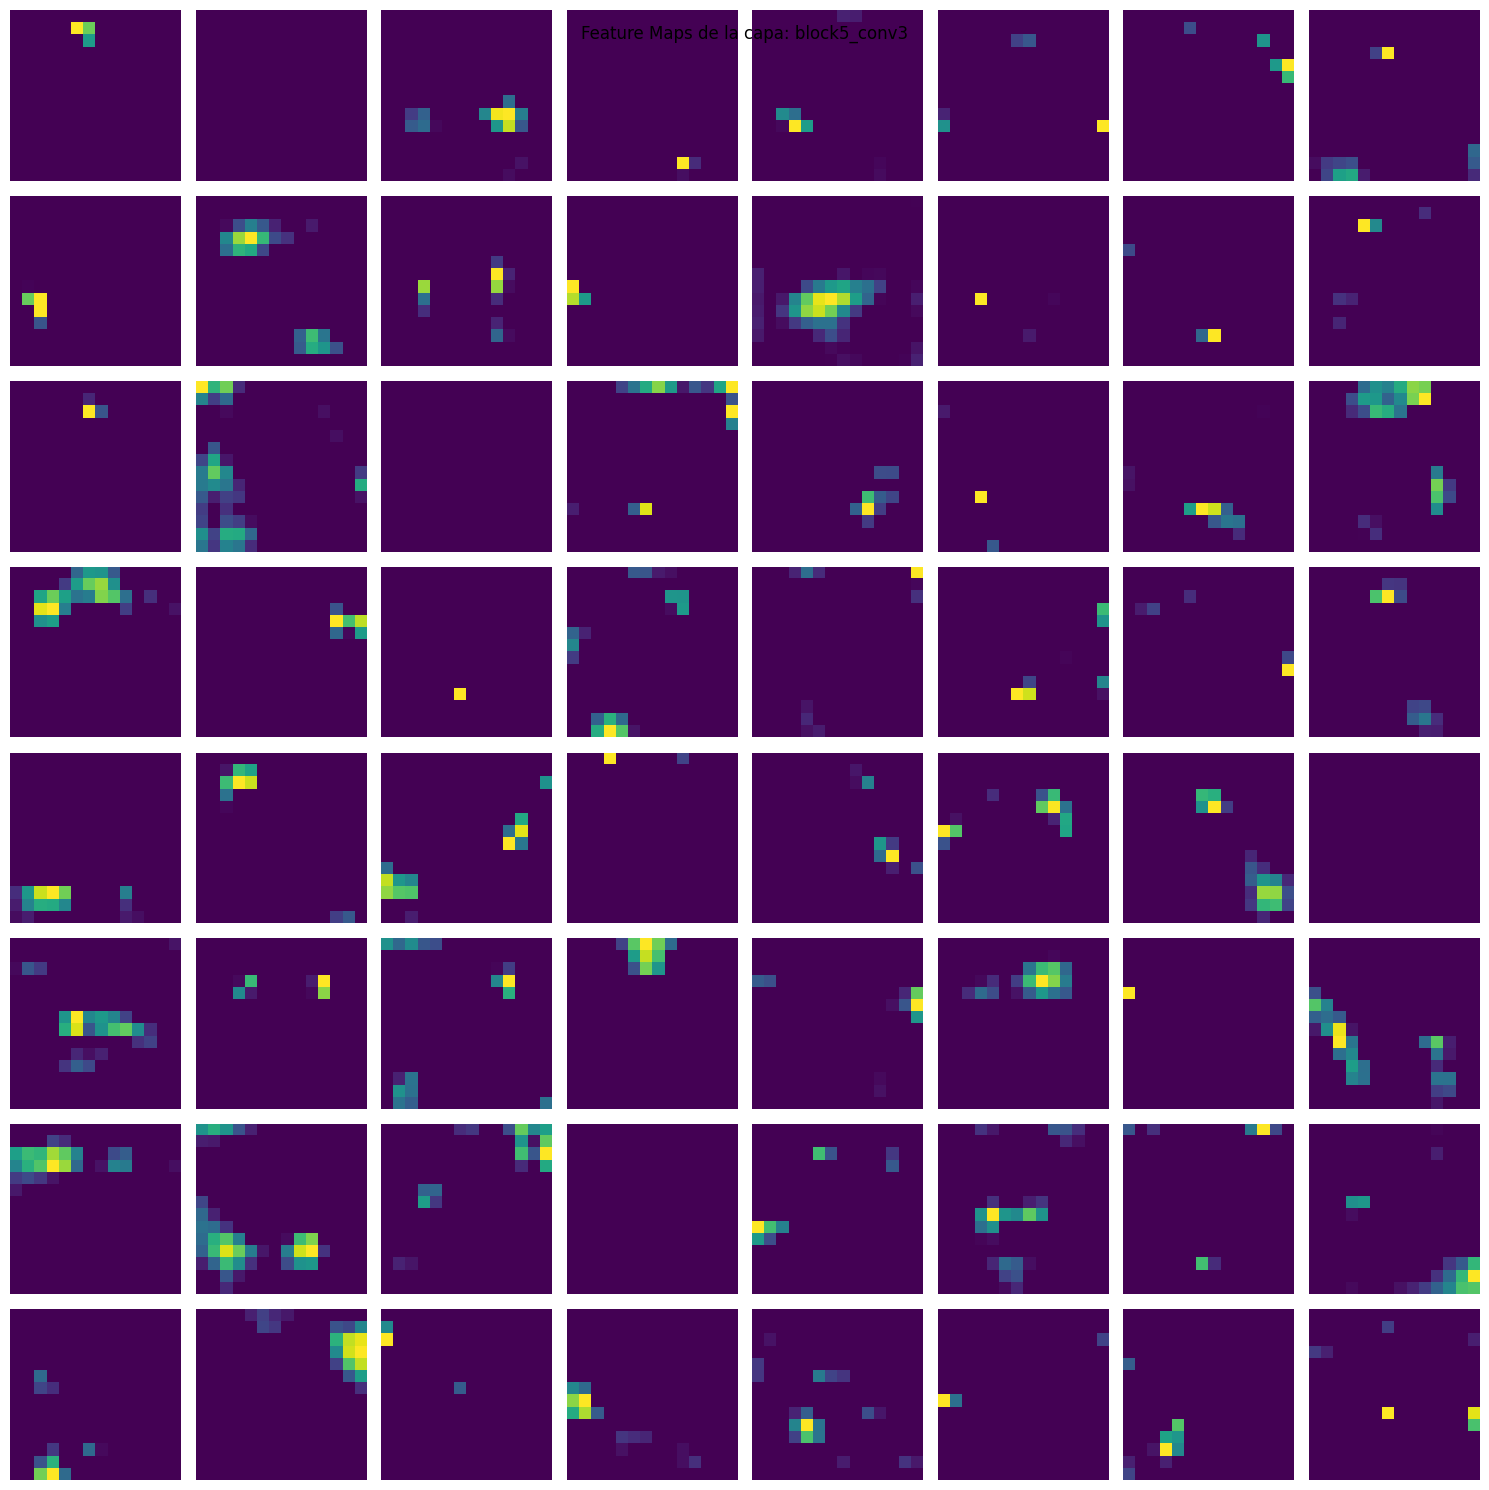

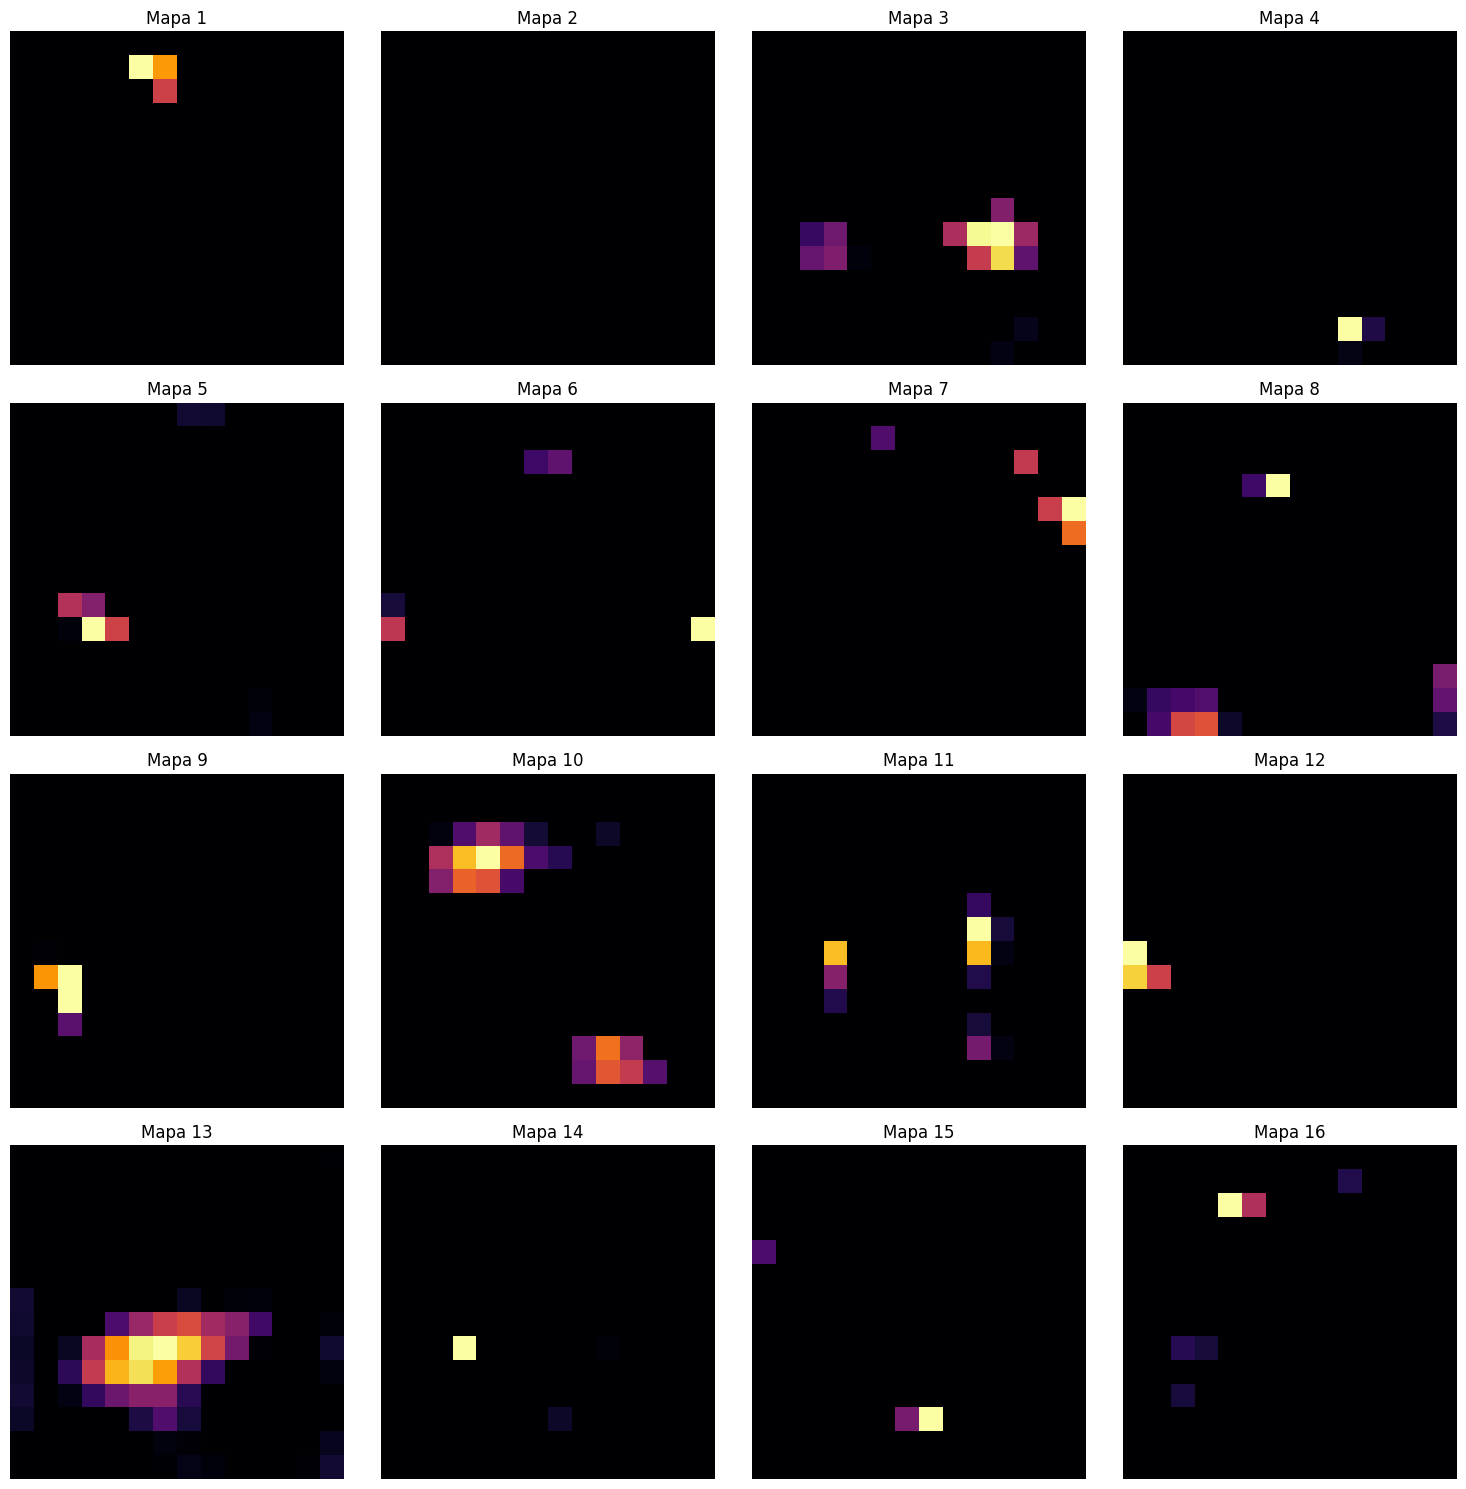

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

# 1. Cargamos un modelo pre-entrenado
modelo_base = VGG16(weights='imagenet', include_top=False)

# 2. Seleccionamos una capa de la que queremos extraer los mapas de características
nombre_capa = 'block3_conv1' 
nombre_capa = 'block3_conv3'  
nombre_capa = 'block1_conv1' 
nombre_capa = 'block5_conv1' 
nombre_capa = 'block5_conv3'


modelo_feature = Model(inputs=modelo_base.input, outputs=modelo_base.get_layer(nombre_capa).output)

# 3. Preparamos una imagen de entrada
ruta_imagen = "C:\\Users\\hegoi\\Datasets\\dogs_cats\\train\\cat.1.jpg"
img = load_img(ruta_imagen, target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Preprocesamiento específico para VGG16

# 4. Obtenemos los mapas de características
feature_maps = modelo_feature.predict(x)

# 5. Visualizamos los primeros 64 mapas de características (o menos si hay menos)
num_maps = min(64, feature_maps.shape[3])
size = 8  # 8x8 grid para mostrar hasta 64 mapas

plt.figure(figsize=(15, 15))
for i in range(num_maps):
    plt.subplot(size, size, i+1)
    feature_map = feature_maps[0, :, :, i]
    plt.imshow(feature_map, cmap='viridis')
    plt.axis('off')
plt.tight_layout()
plt.suptitle(f'Feature Maps de la capa: {nombre_capa}')
plt.show()

# Función alternativa para visualizar mapas de características con más detalle
def visualizar_feature_maps(feature_maps, num_mapas=16, cols=4):
    filas = num_mapas // cols
    plt.figure(figsize=(15, 15))
    
    for i in range(num_mapas):
        mapa = feature_maps[0, :, :, i]
        
        # Normalización para mejor visualización
        mapa = (mapa - mapa.min()) / (mapa.max() - mapa.min() + 1e-7)
        
        plt.subplot(filas, cols, i+1)
        plt.imshow(mapa, cmap='inferno')
        plt.title(f'Mapa {i+1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Usar la función alternativa para una visualización más detallada
visualizar_feature_maps(feature_maps, num_mapas=16)




## Ejemplo 2

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Cargar datos y preprocesar
(X_train, y_train), _ = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)  # (N, 28, 28, 1)

# Definir modelo simple
input_layer = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', name='conv1')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train[:10000], y_train[:10000], epochs=3, batch_size=64)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7129 - loss: 1.1684
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9271 - loss: 0.2661
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9451 - loss: 0.1996


In [9]:
# Seleccionar una imagen
img = X_train[0:1]

# Crear un nuevo modelo que termine en la capa de interés
feature_model = Model(inputs=model.input, outputs=model.get_layer('conv1').output)

# Obtener el mapa de características
feature_maps = feature_model.predict(img)

print("Feature map shape:", feature_maps.shape)  # (1, 26, 26, 32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Feature map shape: (1, 26, 26, 32)


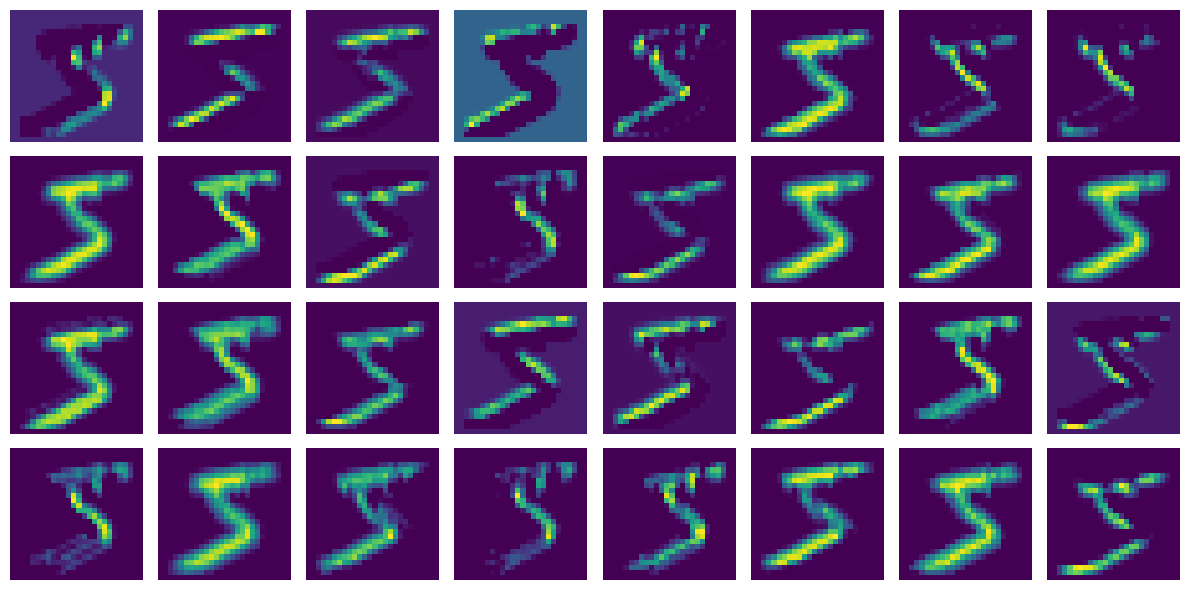

In [10]:
# Graficar los 32 mapas
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.tight_layout()
plt.show()